# INTEGRANTES:
#####            -GONZALO DANIEL GRECCO
#####            -MAURICIO NICOLÁS MOLINA PICCO
#####            -MARÍA INÉS BERDIÑAS

# Módulo 6: Redes Neuronales - Parte II

## Redes Neuronales para clasificación multiclase

En esta actividad vamos a aprender a desarrollar una red neuronal profunda para reconocimiento de imágenes.

Además, estudiaremos algunos detalles de implementación que nos ayudarán a organizar mejor nuestro código y hacerlo más eficiente.

Por otro lado, aprenderemos a utilizar **Callbacks** para detener el proceso de entrenamiento anticipadamente si se alcanza un objetivo deseado.

Para ello, vamos a trabajar con un dataset provisto por Keras: **Fashion MNIST**. Este dataset consta de **70.000 imágenes en escala de grises de 28x28 píxeles**, pertenecientes a una de **10 clases de prendas de vestir** diferentes.

El dataset está dividido en **60.000 imágenes para entrenamiento y 10.000 para testeo**.

Cada imagen representa una prenda de vestir de una de las siguientes categorías:

                                0. T-shirt/top
                                1. Trouser
                                2. Pullover
                                3. Dress
                                4. Coat
                                5. Sandal
                                6. Shirt
                                7. Sneaker
                                8. Bag
                                9. Ankle boot 

Cada píxel tiene un valor asociado entre 0 y 255 que indica su nivel de luminosidad u oscuridad (valores más altos indican mayor oscuridad).

El dataset tiene **785 columnas**, donde la primera corresponde al **label** (la categoría de la prenda) y las 784 restantes representan los features, es decir, los valores de cada uno de los píxeles de la imagen.

La idea es utilizar este dataset para **reconocer prendas de vestir mediante una red neuronal profunda**, compuesta por varias capas (**layers**) y múltiples neuronas. Para ello, será necesario definir un **modelo de clasificación multiclase**.

En primer lugar, vamos a **cargar el dataset en memoria**, dividiéndolo en conjunto de entrenamiento y conjunto de testeo, e imprimiremos sus dimensiones para confirmar que se haya cargado correctamente.


### <font color='red'>**Actividad 1:**</font>
**a)** Escribir un programa en Python para obtener, desde el framework Keras, **el dataset Fashion MNIST dividido en conjunto de entrenamiento (X_train, y_train) y conjunto de testeo (X_test, y_test)**.

**AYUDA:** el dataset fashion_mnist se encuentra dentro de la libreria keras.datasets. Keras provee una forma de obtener el dataset dividido en entrenamiento y testeo con el método [.load_data() ](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data#expandable-1).

In [2]:
from tensorflow.keras.datasets import fashion_mnist

# Carga del dataset (ya dividido en train y test)
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

#Carga el dataset. load_data() devuelve dos tuplas: la primera (X_train, y_train) para entrenamiento y la segunda (X_test, y_test) para testeo

**b)** Imprimir las **dimensiones** de todos los datasets (X_train, y_train, X_test, y test)

In [3]:
print("\n--- Dimensiones (shapes) ---")
print("X_train.shape:", X_train.shape)
print("y_train.shape:", y_train.shape)
print("X_test.shape: ", X_test.shape)
print("y_test.shape: ", y_test.shape)


--- Dimensiones (shapes) ---
X_train.shape: (60000, 28, 28)
y_train.shape: (60000,)
X_test.shape:  (10000, 28, 28)
y_test.shape:  (10000,)


### El resultado de shape de X es (60000,28,28) significa que son:
- 60000 muestras (imagenes)
- 28x28 tamanio de imagenes
- la otra dimension no se muestra porque es 1 (1 dimension para color) pero si fuera rgb tendria otra

### <font color='red'>**Actividad 2:**</font>
**a)** Imprimir dos imágenes cualquiera utilizando la librería **matplotlib**.

**AYUDA:** Recordemos que para imprimir una imagen con matplotlib se puede utilizar el metodo [.imshow(image)](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html#matplotlib-pyplot-imshow), siendo image el vector que contiene los 784 pixeles de la imagen.

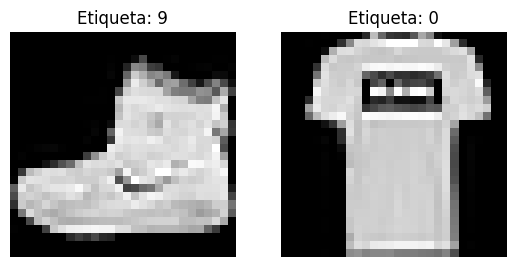

In [26]:
import matplotlib.pyplot as plt #matplotlib es la biblioteca de graficos 

# Mostrar la primera imagen de entrenamiento
plt.subplot(1, 2, 1)                # 1 fila, 2 columnas, primer gráfico
plt.imshow(X_train[0], cmap="gray") # X_train[0] es una matriz 28x28
plt.title(f"Etiqueta: {y_train[0]}")
plt.axis("off")                     
#plt.axis("off") quita los ejes para que se vea más limpio

# Mostrar la segunda imagen de entrenamiento
plt.subplot(1, 2, 2)                # 1 fila, 2 columnas, segundo gráfico
plt.imshow(X_train[1], cmap="gray") # X_train[1] es otra imagen
plt.title(f"Etiqueta: {y_train[1]}")
plt.axis("off")

plt.show()

### <font color='red'>**Actividad 3:**</font>
**a)** **Normalizar los valores de los features** en los datasets de entrenamiento y testeo (X_train y X_test) dividiendo los valores de los pixeles por 255.

In [11]:
"""
Los píxeles en Fashion MNIST van de 0 a 255 (uint8).
Al dividir entre 255, los llevamos al rango [0, 1], lo que hace que el entrenamiento sea más estable y eficiente.
"""
#astype("float32") convierte los pixeles enteros a números decimales
X_train = X_train.astype("float32") / 255.0 
X_test  = X_test.astype("float32") / 255.0

# Verificamos resultados
print("Rango X_train: min =", X_train.min(), ", max =", X_train.max())
print("Rango X_test:  min =", X_test.min(),  ", max =", X_test.max())


Rango X_train: min = 0.0 , max = 1.0
Rango X_test:  min = 0.0 , max = 1.0


### Callbacks

Los Callbacks de Keras son objetos que ejecutan acciones en distintas etapas del proceso de entrenamiento (por ejemplo, al comienzo o al final de cada epoch). Generalmente, se utilizan para escribir registros (logs) de monitoreo, guardar el modelo en disco periódicamente, detener el entrenamiento anticipadamente, entre otras funciones.

El siguiente código muestra cómo crear un Callback personalizado en TensorFlow/Keras que detiene el entrenamiento cuando se alcanza un valor máximo de precisión definido previamente:

```
class callbacks(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get("accuracy") > MAX_ACC:
            self.model.stop_training = True
```

Este tipo de callback se pasa como parámetro al método .fit() mediante el argumento callbacks.

### <font color='red'>**Actividad 4:**</font>
**a)** Crear una clase **Callback** que detenga el proceso de entrenamiento al finalizar un epoch si se alcanza un valor de accuracy igual o superior a 0.95, e imprima el siguiente mensaje de aviso:

	“Se alcanzó el máximo de precisión y, por lo tanto, se canceló el proceso de entrenamiento.”


In [32]:
import tensorflow as tf

# Definición de Callback personalizado
class EarlyStopAtAcc(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        max_accuracy = 0.95
        acc = logs.get("accuracy")
        if acc is not None and acc >= max_accuracy:
            print("\nSe alcanzó el máximo de precisión y, por lo tanto, se canceló el proceso de entrenamiento.")
            self.model.stop_training = True

### Ordenando el código
Ahora que tenemos los datasets de entrenamiento y testeo normalizados, y hemos observado algunos ejemplos, vamos a crear el modelo, compilarlo y entrenarlo.

Para ello, definiremos un método que reúna todo el proceso completo:
1. Obtener el dataset de entrenamiento y de testeo (resuelto en Actividad 1.a.)
2. Normalizar los features de entrenamiento y testeo (resuelto en Actividad 3.)
3. Crear el modelo en Keras
4. Compilar el modelo (.compile(...))
5. Ajustar o entrenar (.fit(...)) el modelo pasandole el callback creado y almacenando el historial del proceso de entrenamiento.
6. Retornar el historial del proceso de entrenamiento y el modelo creado.

#### 🔧 Creación del modelo

Vamos a construir una red neuronal con cuatro capas ocultas:
- La primera con **512 neuronas**,
- La segunda con **256 neuronas**,
- La tercera con **128 neuronas**,
- La cuarta con **64 neuronas**.

Como se trata de un problema de **clasificación multiclase**, al final del modelo utilizaremos la función de activación **softmax**. Sin embargo, implementaremos la **versión mejorada** vista en el apunte: la última capa tendrá activación **lineal**, y la función **softmax** se aplicará luego, por fuera del modelo.

Además, como estamos trabajando con imágenes, la primera capa de nuestra red debe ser una capa Flatten(), que transforma cada imagen 28x28 en un vector de 784 elementos.

#### ⚙️ Compilación del modelo

Al compilar el modelo:
- Usaremos el optimizador **Adam** (optimizer='adam')
- Como métrica de evaluación, emplearemos **accuracy** (metrics=['accuracy'])
- Usaremos *SparseCategoricalCrossentropy(from_logits=True)* como función de pérdida ya que estamos utilizando logits como salida (activación lineal en la última capa)

#### 🏋️ Entrenamiento del modelo

Al entrenar el modelo con .fit(), le pasaremos:
- Le pasaremos el **callback personalizado** creado anteriormente (callbacks=[myCallback])
- Definiremos la cantidad de **epochs en 100** (epochs=100)

#### 📈 Historial del entrenamiento

El historial del proceso es devuelto por el método .fit() como un objeto History. Este objeto guarda, en su atributo .history, los registros de los valores de error y las métricas obtenidas en cada epoch.


### <font color='red'>**Actividad 5:**</font>
**a)** Crear un método llamado train_fashion_mnist() que englobe los seis pasos mencionados anteriormente. Notar que algunos de estos pasos ya fueron resueltos en ejercicios anteriores, por lo tanto, simplemente debemos **copiar las líneas de código correspondientes dentro de este nuevo método** para integrarlos al flujo completo de entrenamiento.

In [34]:

import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import layers, models
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.nn import softmax

# Callback personalizado que detiene el entrenamiento al alcanzar 95% de accuracy
class EarlyStopAtAcc(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        acc = logs.get("accuracy")
        if acc is not None and acc >= 0.95:
            print("\nSe alcanzó el máximo de precisión y, por lo tanto, se canceló el proceso de entrenamiento.")
            self.model.stop_training = True

def train_fashion_mnist():

    # Creamos un objeto de la clase callbacks creada anteriormente
    myCallback = EarlyStopAtAcc()
    
    # 1. Obtener el dataset de entrenamiento y de testeo (resuelto en Ejercicio 1) a.)
    (X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
    
    # 2. Normalizar los features de entrenamiento y testeo (resuelto en Ejercicio 3.)
    X_train = X_train.astype("float32") / 255.0
    X_test  = X_test.astype("float32") / 255.0
    
    # 3. Crear el modelo en Keras
    model = models.Sequential([
        layers.Flatten(input_shape=(28, 28)),   # Aplana la imagen 28x28 en vector 784
        layers.Dense(512, activation="relu"),
        layers.Dense(256, activation="relu"),
        layers.Dense(128, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(10, activation="linear")   # salida lineal
    ])
    
    # 4. Compilar el modelo (.compile(...))
    model.compile(
        optimizer="adam",
        loss=SparseCategoricalCrossentropy(from_logits=True), 
        metrics=["accuracy"]
    ) #Cuando from_logits=True, Keras aplica internamente un softmax a los logits antes de calcular la entropía cruzada. 
        #De esta forma, no necesitamos poner activation="softmax" dentro del modelo.
    
    # 5. Ajustar o entrenar (.fit(...)) el modelo pasandole el callback creado y almacenando el historial del proceso de entrenamiento.
    history = model.fit(
        X_train, y_train,
        epochs=100,
        callbacks=[myCallback],
        validation_data=(X_test, y_test),
        verbose=2
    )
    
    # 6.Retornar el historial del proceso de entrenamiento.
    return history.history, model


Ahora que tenemos un método capaz de realizar todo el proceso completo, **lo único que resta es llamar a dicho método** para obtener el objeto history y el model.

El entrenamiento debería finalizar aproximadamente en el **epoch 35**, si se alcanza el nivel de precisión definido en el callback.

In [35]:
history, model = train_fashion_mnist()

C:\Users\Ezequiel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
1875/1875 - 17s - 9ms/step - accuracy: 0.8207 - loss: 0.4926 - val_accuracy: 0.8575 - val_loss: 0.3928
Epoch 2/100
1875/1875 - 14s - 8ms/step - accuracy: 0.8641 - loss: 0.3701 - val_accuracy: 0.8660 - val_loss: 0.3719
Epoch 3/100
1875/1875 - 14s - 7ms/step - accuracy: 0.8774 - loss: 0.3340 - val_accuracy: 0.8597 - val_loss: 0.3933
Epoch 4/100
1875/1875 - 13s - 7ms/step - accuracy: 0.8869 - loss: 0.3076 - val_accuracy: 0.8684 - val_loss: 0.3591
Epoch 5/100
1875/1875 - 13s - 7ms/step - accuracy: 0.8921 - loss: 0.2905 - val_accuracy: 0.8773 - val_loss: 0.3449
Epoch 6/100
1875/1875 - 14s - 7ms/step - accuracy: 0.8982 - loss: 0.2730 - val_accuracy: 0.8685 - val_loss: 0.3627
Epoch 7/100
1875/1875 - 14s - 8ms/step - accuracy: 0.9017 - loss: 0.2625 - val_accuracy: 0.8813 - val_loss: 0.3358
Epoch 8/100
1875/1875 - 14s - 7ms/step - accuracy: 0.9066 - loss: 0.2513 - val_accuracy: 0.8787 - val_loss: 0.3430
Epoch 9/100
1875/1875 - 14s - 7ms/step - accuracy: 0.9076 - loss: 0.2427 - val_a

Hay que tener en cuenta que, en el modelo creado, **aún no se ha aplicado la función softmax**, por lo que las salidas **no representan probabilidades**. Es decir, los valores de salida pueden estar en el rango **[-∞, +∞]**.

A continuación, vamos a observar los valores de salida para el **primer ejemplo** del conjunto de entrenamiento. Además, analizaremos **los valores máximos y mínimos** de todas las salidas para confirmar que **no se trata de probabilidades**.

In [36]:
import numpy as np

# Obtener las salidas del modelo (logits) sin aplicar softmax
train_logits = model.predict(X_train)

# Mostrar los valores de salida para el primer ejemplo
print("Salidas sin softmax para el primer ejemplo:")
print(train_logits[0])

# Obtener el valor máximo y mínimo entre todas las salidas
valor_maximo = np.max(train_logits)
valor_minimo = np.min(train_logits)

print("\nValor máximo entre todas las salidas:", valor_maximo)
print("Valor mínimo entre todas las salidas:", valor_minimo)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step
Salidas sin softmax para el primer ejemplo:
[-3125.329   -4231.3447  -6613.497   -8286.363   -4685.825   -2365.0823
 -6052.7036    852.36694 -1734.9478   3653.459  ]

Valor máximo entre todas las salidas: 86792.7
Valor mínimo entre todas las salidas: -264602.38


##### ¿Qué esperar de la salida?

- Un array de 10 valores para logits[0], correspondientes a las 10 clases posibles.
- Valores fuera del rango [0, 1], confirmando que **no son probabilidades**.
- Máximos y mínimos que podrían estar bastante alejados de 0 o 1 (por ejemplo, negativos o mayores que 1).

Si queremos poder interpretar las salidas, debemos **aplicar la función Softmax para convertirlas en probabilidades**. Esta operación transforma los valores en un rango entre 0 y 1, y asegura que la suma total sea igual a 1, lo cual es característico de una distribución de probabilidad.

In [25]:
# Aplicar softmax a todas las salidas
train_pred = softmax(train_logits).numpy()

# Mostrar las probabilidades del primer ejemplo
print("Probabilidades para el primer ejemplo:")
print(train_pred[0])

# Verificar que la suma de cada fila sea 1 (opcional)
sum_train_pred = np.sum(train_pred, axis=1)

# Mostrar suma de probabilidades de los primeros 5 ejemplos
print("\nSuma de probabilidades (primeros 5 ejemplos):")
print(sum_train_pred[:5])

Probabilidades para el primer ejemplo:
[4.2198710e-11 1.1826308e-09 2.1591042e-08 1.6675794e-07 7.6881296e-10
 2.2415340e-06 8.3009993e-10 6.9456242e-02 6.4860366e-08 9.3054128e-01]

Suma de probabilidades (primeros 5 ejemplos):
[1.        1.        1.0000001 1.0000001 1.       ]



Como se observa, los valores de salida se encuentran en el rango **[0, 1]**. 

Además, si sumamos las probabilidades correspondientes a un ejemplo, el resultado debería ser **1.0**, ya que representan una distribución de probabilidad.

(**Nota:** Se puede modificar el índice del ejemplo y verificar que, efectivamente, para cualquier caso, la suma de las probabilidades siempre da 1.0).


#### ¿Cómo obtener las categorías estimadas?
Para obtener que categoría que se estimó con el modelo para un ejemplo dado se debe seleccionar la categoría más probable. 

Para ello, es posible encontrar el índice de la salida con mayor probabilidad utilizando np.argmax(). 

A continuación se muestran las categorías estimadas y las reales para los 10 primeros ejemplos del dataset de testeo.

In [26]:
test_logits = model.predict(X_test)

test_pred = softmax(test_logits)
    
# Obtener las categorías predichas seleccionando el índice con la mayor probabilidad
test_predicted_labels = np.argmax(test_pred, axis=1)

# Mostrar las etiquetas predichas y reales para los primeros 10 ejemplos
print("Etiquetas estimadas vs etiquetas reales (primeros 10 ejemplos):")
for i in range(10):
    print(f"Ejemplo {i}: Estimada = {test_predicted_labels[i]}, Real = {y_test[i]}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Etiquetas estimadas vs etiquetas reales (primeros 10 ejemplos):
Ejemplo 0: Estimada = 9, Real = 9
Ejemplo 1: Estimada = 2, Real = 2
Ejemplo 2: Estimada = 1, Real = 1
Ejemplo 3: Estimada = 1, Real = 1
Ejemplo 4: Estimada = 6, Real = 6
Ejemplo 5: Estimada = 1, Real = 1
Ejemplo 6: Estimada = 4, Real = 4
Ejemplo 7: Estimada = 6, Real = 6
Ejemplo 8: Estimada = 5, Real = 5
Ejemplo 9: Estimada = 7, Real = 7


### Evaluación del modelo

Para evaluar el desempeño del modelo de forma cuantitativa, vamos a calcular el **accuracy** tanto sobre el conjunto de entrenamiento como sobre el de testeo.
Para ello, utilizaremos la función **accuracy_score** del módulo sklearn.metrics, que compara las etiquetas verdaderas con las predicciones generadas por el modelo.

In [27]:
from sklearn.metrics import accuracy_score

# Predicciones en entrenamiento
train_logits = model.predict(X_train)
train_pred = np.argmax(softmax(train_logits).numpy(), axis=1)
train_acc = accuracy_score(y_train, train_pred)
print(f"Accuracy en entrenamiento: {train_acc:.4f}")

# Predicciones en testeo
test_logits = model.predict(X_test)
test_pred = np.argmax(softmax(test_logits).numpy(), axis=1)
test_acc = accuracy_score(y_test, test_pred)
print(f"Accuracy en testeo: {test_acc:.4f}")

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
Accuracy en entrenamiento: 0.9564
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy en testeo: 0.8878


## Observaciones finales:

Si todo salió bien, en este punto el modelo de red neuronal debería alcanzar un accuracy del >90% en el conjunto de entrenamiento y un poco menor en el conjunto de testeo, lo cual indica un buen desempeño general en la tarea de clasificación multiclase. Sin embargo, habría que analizar la diferencia entre ambos valores porque puede sugerir un **ligero overfitting**, es decir, el modelo se ajustó mejor a los datos de entrenamiento que a los datos nuevos. De cualquier forma, la generalización sigue siendo aceptable.

Podría evaluarse el uso de técnicas de regularización (como dropout o L2), aumento de datos o ajuste de hiperparámetros para reducir esta brecha y mejorar la robustez del modelo.